In [1]:
# DATA MANIPULATION
import numpy as np  # NUMPY
import pandas as pd # PANDAS

from keras.datasets import cifar10

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import seaborn as sns

# MISC
from sklearn.metrics import classification_report

Using TensorFlow backend.
/Users/krishnavdave/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/krishnavdave/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/krishnavdave/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/krishnavdave/opt

In [2]:
# loading the dataset 
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

In [3]:
# DATA SET SHAPE AND SIZE

print('\nTraining data : ', train_X.shape, train_Y.shape)  # TRAIN

print('\nTesting data : ', test_X.shape, test_Y.shape) # TEST

print('\nTraining data =',round(100*train_X.shape[0]/(train_X.shape[0]+test_X.shape[0]),2),"% of total data")

print('\nTesting data =',round(100*test_X.shape[0]/(train_X.shape[0]+test_X.shape[0]),2),"% of total data")


Training data :  (50000, 32, 32, 3) (50000, 1)

Testing data :  (10000, 32, 32, 3) (10000, 1)

Training data = 83.33 % of total data

Testing data = 16.67 % of total data


In [4]:
# ANALYZE LABELS

Labels = np.unique(train_Y)  # DISPLAY UNIQUE LABELS

NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS

print('\nLabels : ', Labels)

print('\nTotal number of labels : ', NumberOfLabels)


Labels :  [0 1 2 3 4 5 6 7 8 9]

Total number of labels :  10


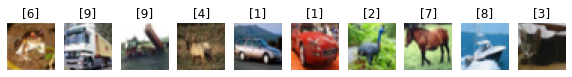

In [5]:
# visualizing the first 10 images in the dataset and their labels

N=10  # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(train_X[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(train_Y[i]))
    plt.axis('off')
plt.show()

In [6]:
train_X[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
train_X = train_X.astype('float32')
train_X = train_X.reshape(train_X.shape[0],32,32,3)
train_X = train_X / 255.

test_X = test_X.astype('float32')
test_X = test_X.reshape(test_X.shape[0], 32,32,3)
test_X = test_X / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape) # TEST


Training data :  (50000, 32, 32, 3)

Testing data :  (10000, 32, 32, 3)


### CNN model 1

To add my points on the hp


1. Input shape: 32 x 32 , 3 channel

2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
    
4. Layer 3: Neural network
    - Dense layer units: 64 
    - Softmax output units: 10 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (32, 32, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 10, activation = 'softmax')) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [10]:
MODEL1=model_1.fit(train_X, train_Y, epochs = 15, validation_data = (test_X, test_Y), initial_epoch=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 31s 620us/sample - loss: 1.2641 - acc: 0.5506 - val_loss: 1.0771 - val_acc: 0.6219
Epoch 2/15
50000/50000 [==============================] - 32s 639us/sample - loss: 0.9181 - acc: 0.6800 - val_loss: 0.9295 - val_acc: 0.6719
Epoch 3/15
50000/50000 [==============================] - 32s 646us/sample - loss: 0.7849 - acc: 0.7290 - val_loss: 0.8389 - val_acc: 0.7098
Epoch 4/15
50000/50000 [==============================] - 32s 649us/sample - loss: 0.6812 - acc: 0.7633 - val_loss: 0.8345 - val_acc: 0.7165
Epoch 5/15
50000/50000 [==============================] - 33s 663us/sample - loss: 0.6036 - acc: 0.7881 - val_loss: 0.8647 - val_acc: 0.7137
Epoch 6/15
50000/50000 [==============================] - 32s 642us/sample - loss: 0.5399 - acc: 0.8090 - val_loss: 0.9126 - val_acc: 0.7088
Epoch 7/15
50000/50000 [==============================] - 33s 653us/sample - loss: 0.4772 - acc: 0.8308 

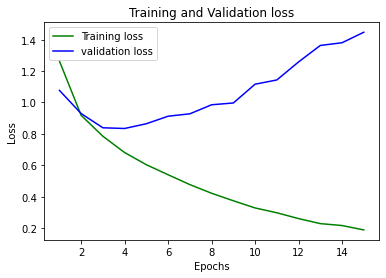

In [12]:
EPOCH=15
loss_train = MODEL1.history['loss']
loss_val = MODEL1.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

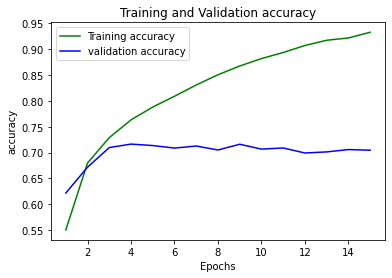

In [13]:
EPOCH=15
Acc_train = MODEL1.history['acc']
Acc_val = MODEL1.history['val_acc']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
### CNN model 2

To add my points on the hp


1. Input shape: 32 x 32 , 3 channel

2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 3
    - Padding: 0
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 3
    - Padding: 0
    - Stride: 1
    
4. Layer 3: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 3
    - Padding: 0
    - Stride: 1

4. Layer 4: Neural network
    - Dense layer units: 64 
    - Dense layer units: 32 
    - Dense layer units: 16 
    - Softmax output units: 10 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_2 = Sequential()

model_2.add(BatchNormalization(input_shape = (32, 32, 3)))

model_2.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_2.add(MaxPooling2D(pool_size = 3))


model_2.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = 3))

model_2.add(Convolution2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = 3))

model_2.add(Flatten()) 

# fully connected layer
model_2.add(Dense(units = 64,activation = 'relu'))
model_2.add(Dense(units = 32,activation = 'relu'))
model_2.add(Dense(units = 16,activation = 'relu'))

# Classification layer
model_2.add(Dense(units = 10, activation = 'softmax')) 

In [15]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 16)         

In [16]:
MODEL_2=model_2.fit(train_X, train_Y, epochs = 5, validation_data = (test_X, test_Y), initial_epoch=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 31s 612us/sample - loss: 1.6579 - acc: 0.3822 - val_loss: 1.3474 - val_acc: 0.5097
Epoch 2/5
50000/50000 [==============================] - 31s 624us/sample - loss: 1.2711 - acc: 0.5402 - val_loss: 1.1926 - val_acc: 0.5685
Epoch 3/5
50000/50000 [==============================] - 33s 658us/sample - loss: 1.1240 - acc: 0.5984 - val_loss: 1.1121 - val_acc: 0.6023
Epoch 4/5
50000/50000 [==============================] - 32s 650us/sample - loss: 1.0308 - acc: 0.6341 - val_loss: 1.0492 - val_acc: 0.6359
Epoch 5/5
50000/50000 [==============================] - 33s 656us/sample - loss: 0.9654 - acc: 0.6569 - val_loss: 1.0258 - val_acc: 0.6345


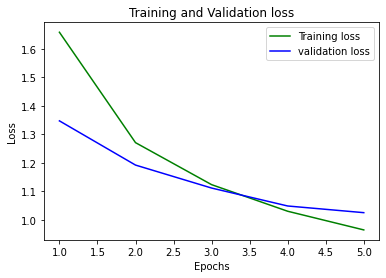

In [17]:
EPOCH=5
loss_train = MODEL_2.history['loss']
loss_val = MODEL_2.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

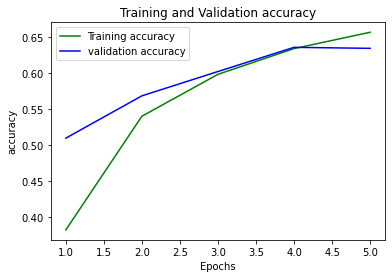

In [18]:
EPOCH=5
Acc_train = MODEL_2.history['acc']
Acc_val = MODEL_2.history['val_acc']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### CNN model 3

To add my points on the hp


1. Input shape: 32 x 32 , 3 channel

2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
4. Layer 3: Convolution
    - Number of Filters: 128
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1

5. Layer 4: Convolution
    - Number of Filters: 256
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1

4. Layer 5: Neural network
    - Dense layer units: 128 
    - Dense layer units: 64 
    - Dense layer units: 32
    - Dense layer units: 16
    - Dense layer units: 8 
    - Softmax output units: 10 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_3 = Sequential()

model_3.add(BatchNormalization(input_shape = (32, 32, 3)))

model_3.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_3.add(MaxPooling2D(pool_size = 2))

model_3.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = 2))

model_3.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = 3))

model_3.add(Convolution2D(filters = 256, kernel_size = 2, padding = 'same', activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = 2))

model_3.add(Flatten()) 

# fully connected layer
model_3.add(Dense(units = 128,activation = 'relu'))
model_3.add(Dense(units = 64, activation = 'relu'))
model_3.add(Dense(units = 32, activation = 'relu'))
model_3.add(Dense(units = 16, activation = 'relu'))
model_3.add(Dense(units = 8, activation = 'relu'))

model_3.add(Dense(units = 10, activation = 'softmax')) 

In [20]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model_3.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        32832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 128)        

In [21]:
MODEL3=model_3.fit(train_X, train_Y, epochs = 5, validation_data = (test_X, test_Y), initial_epoch=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.8065 - acc: 0.2890 - val_loss: 1.4594 - val_acc: 0.4726
Epoch 2/5
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.2414 - acc: 0.5578 - val_loss: 1.0893 - val_acc: 0.6198
Epoch 3/5
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.9611 - acc: 0.6661 - val_loss: 0.9310 - val_acc: 0.6833
Epoch 4/5
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.8043 - acc: 0.7258 - val_loss: 0.8197 - val_acc: 0.7274
Epoch 5/5
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.7057 - acc: 0.7587 - val_loss: 0.8841 - val_acc: 0.7217


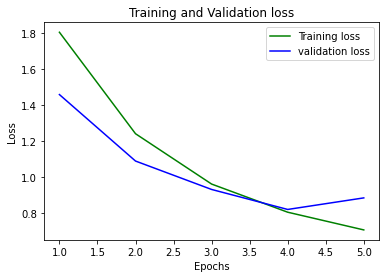

In [22]:
EPOCH=5
loss_train = MODEL3.history['loss']
loss_val = MODEL3.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

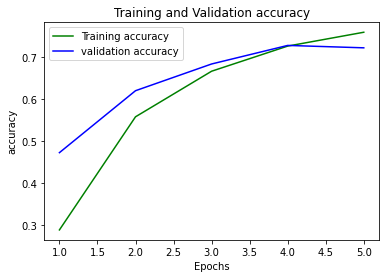

In [23]:
EPOCH=5
Acc_train = MODEL3.history['acc']
Acc_val = MODEL3.history['val_acc']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Deeper networks yield better accurarcies with same number of epochs